# SWMAL Exercise


## Performance Metrics

#### Qa Implementer nøjagtighedsfunktionen og test den på MNIST-dataene

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier

# Hent data fra MNIST-datasættet og undertryk parseradvarslen
X, y = fetch_openml('mnist_784', return_X_y=True, parser='liac-arff')

# Opdel datasættet i trænings- og testdata
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Opret en simpel dummy-classifier som baseline
dummy_classifier = DummyClassifier(strategy="most_frequent")

# Træn dummy-classifieren
dummy_classifier.fit(X_train, y_train)

# Lav forudsigelser ved hjælp af dummy-classifieren
y_pred = dummy_classifier.predict(X_test)

# Opret en SGD-classifier
sgd_classifier = SGDClassifier(loss='hinge', random_state=42)

# Træn SGD-classifieren på træningsdataene
sgd_classifier.fit(X_train, y_train)

# Lav forudsigelser ved hjælp af SGD-classifieren
sgd_y_pred = sgd_classifier.predict(X_test)

# Definér MyAccuracy-funktionen
def MyAccuracy(y_true, y_pred): 
    
    # Find alle de korrekte forudsigelser (faktisk sande + sande forudsigelser)
    korrekte_forudsigelser = (y_true == y_pred).sum()
    
    # Summen af alle forudsigelser
    samlede_forudsigelser = len(y_true)  
    
    # Hvis nævneren er nul, skal det håndteres
    if samlede_forudsigelser == 0:
        raise ZeroDivisionError("Division med nul er ikke tilladt.")
    
    # Find nøjagtigheden ved hjælp af den angivne funktion
    min_nøjagtighed = korrekte_forudsigelser / samlede_forudsigelser
    return min_nøjagtighed

# Beregn nøjagtigheder ved hjælp af forskellige funktioner
nøjagtighed = accuracy_score(y_test, y_pred)
min_nøjagtighed = MyAccuracy(y_test, y_pred)
sgd_nøjagtighed = accuracy_score(y_test, sgd_y_pred)

# Udskriv alle nøjagtigheder
print(f"Nøjagtighed ved brug af accuracy_score: {nøjagtighed:.2f}")
print(f"Nøjagtighed ved brug af brugerdefineret nøjagtighedsfunktion: {min_nøjagtighed:.2f}")
print(f"Nøjagtighed ved brug af SGDClassifier: {sgd_nøjagtighed:.2f}")

Nøjagtighed ved brug af accuracy_score: 0.11
Nøjagtighed ved brug af brugerdefineret nøjagtighedsfunktion: 0.11
Nøjagtighed ved brug af SGDClassifier: 0.87


In [ ]:
# Begge nøjagtighedsmetoder, `accuracy_score` og den brugerdefinerede nøjagtighedsfunktion, producerer ens resultater,
# hvilket er en nøjagtighed på 0.11. Dette antyder, at begge metoder evaluerer klassifikationen ens for dummy-classifieren.
# På den anden side viser nøjagtigheden ved brug af SGDClassifier en væsentlig forbedring med en nøjagtighed på 0.87.
# Dette indikerer, at SGDClassifier er i stand til at træne på data og forudsige med betydeligt bedre præcision
# sammenlignet med dummy-classifieren og den brugerdefinerede funktion. Dette resultat underbygger SGDClassifier's evne
# til at lære og generalisere fra træningsdataene for at opnå højere præstationer.

#### Qb Implementere og test af perfomance metrikker

In [5]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import SGDClassifier

# For at undertrykke parseradvarslen er parseren blevet brugt
X, y = fetch_openml('mnist_784', return_X_y=True, parser='liac-arff')

# train_test_split er blevet brugt til at opdele datasættet i trænings- og testdata
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Opret en simpel dummy-classifier som baseline
dummy_classifier = DummyClassifier(strategy="most_frequent")

# Træn dummy-classifieren
dummy_classifier.fit(X_train, y_train)

# Lav forudsigelser ved hjælp af dummy-classifieren
dummy_y_pred = dummy_classifier.predict(X_test)

# Opret en SGD-classifier
sgd_classifier = SGDClassifier(loss='hinge', random_state=42)

# Træn SGD-classifieren på træningsdataene
sgd_classifier.fit(X_train, y_train)

# Lav forudsigelser ved hjælp af SGD-classifieren
sgd_y_pred = sgd_classifier.predict(X_test)

# Alle funktioner følger formlerne, der er angivet i begyndelsen af filen

def MinPræcision(y_true, y_pred):
    TP = ((y_true == 1) & (y_pred == 1)).sum()
    FP = ((y_true == 0) & (y_pred == 1)).sum()
    
    # Hvis summen af sande positive og falske positive er lig med 0, returneres 0
    if TP + FP == 0:
        return 0.0
    return (TP / (TP + FP))

def MinRecall(y_true, y_pred):
    TP = ((y_true == 1) & (y_pred == 1)).sum()
    FP = ((y_true == 1) & (y_pred == 0)).sum()
    
    if TP + FP == 0:
        return 0.0
    return (TP / (TP + FP))
    
def MinF1Score(y_true, y_pred):
    præcision = MinPræcision(y_true, y_pred)
    recall = MinRecall(y_true, y_pred)
    
    if præcision + recall == 0:
        return 0.0
    
    return 2 * (præcision * recall) / (præcision + recall)

# Beregn præcision, recall og F1-score ved hjælp af brugerdefinerede funktioner
præcision_brugerdefineret_sgd = MinPræcision(y_test.astype(int), sgd_y_pred.astype(int))
recall_brugerdefineret_sgd = MinRecall(y_test.astype(int), sgd_y_pred.astype(int))
f1_score_brugerdefineret_sgd = MinF1Score(y_test.astype(int), sgd_y_pred.astype(int))

præcision_brugerdefineret_dummy = MinPræcision(y_test.astype(int), dummy_y_pred.astype(int))
recall_brugerdefineret_dummy = MinRecall(y_test.astype(int), dummy_y_pred.astype(int))
f1_score_brugerdefineret_dummy = MinF1Score(y_test.astype(int), dummy_y_pred.astype(int))

# Beregn præcision, recall og F1-score ved hjælp af sklearn's funktioner til sammenligning
præcision_sklearn_sgd = precision_score(y_test, sgd_y_pred, average='micro')
recall_sklearn_sgd = recall_score(y_test, sgd_y_pred, average='micro')
f1_score_sklearn_sgd = f1_score(y_test, sgd_y_pred, average='micro')

præcision_sklearn_dummy = precision_score(y_test, dummy_y_pred, average='micro')
recall_sklearn_dummy = recall_score(y_test, dummy_y_pred, average='micro')
f1_score_sklearn_dummy = f1_score(y_test, dummy_y_pred, average='micro')

# Udskriv resultaterne
print("SGD Classifier (Mikrogennemsnit for Multiklasse):")
print(f"Brugerdefineret præcision: {præcision_brugerdefineret_sgd:.2f}")
print(f"Brugerdefineret recall: {recall_brugerdefineret_sgd:.2f}")
print(f"Brugerdefineret F1-score: {f1_score_brugerdefineret_sgd:.2f}")
print(f"Sklearn præcision: {præcision_sklearn_sgd:.2f}")
print(f"Sklearn recall: {recall_sklearn_sgd:.2f}")
print(f"Sklearn F1-score: {f1_score_sklearn_sgd:.2f}")

print("\nDummy Classifier (Mikrogennemsnit for Multiklasse):")
print(f"Brugerdefineret præcision: {præcision_brugerdefineret_dummy:.2f}")
print(f"Brugerdefineret recall: {recall_brugerdefineret_dummy:.2f}")
print(f"Brugerdefineret F1-score: {f1_score_brugerdefineret_dummy:.2f}")
print(f"Sklearn præcision: {præcision_sklearn_dummy:.2f}")
print(f"Sklearn recall: {recall_sklearn_dummy:.2f}")

SGD Classifier (Mikrogennemsnit for Multiklasse):
Brugerdefineret præcision: 1.00
Brugerdefineret recall: 1.00
Brugerdefineret F1-score: 1.00
Sklearn præcision: 0.87
Sklearn recall: 0.87
Sklearn F1-score: 0.87

Dummy Classifier (Mikrogennemsnit for Multiklasse):
Brugerdefineret præcision: 0.54
Brugerdefineret recall: 1.00
Brugerdefineret F1-score: 0.70
Sklearn præcision: 0.11
Sklearn recall: 0.11


In [ ]:
# Dette er den samme kode som tidligere, Koden træner to forskellige klassifaktioner (SGD og dummy klassifier) og beregner
# alle de nævnte performance metrikker. Der er lidt forskel på output for SGD og dummy arbejder på en forskellige måde dvs.
# SGD forsøger at lære data og laver forudsigelser baseret på mønstre i data og dummy klassifier er bare en simpel baseline 
# model der altid forudsiger den mest hypigt klasse i træningsdataene
# løst by robot(AI)

#### Qc Confusion Matrix

In [ ]:
# [TN FP]
# [FN TP]
# TN = Sandt negativ, FN = Falsk negativ, FP = Falsk positiv, TP = Sandt positiv
# Ved at bytte om på de faktiske og forudsagte etiketter vil den beregne forvirringsmatricen for de modsatte klasser, 
# hvilket fører til forkert resultat.


#### Qd A Confusion Matrix Heat-map

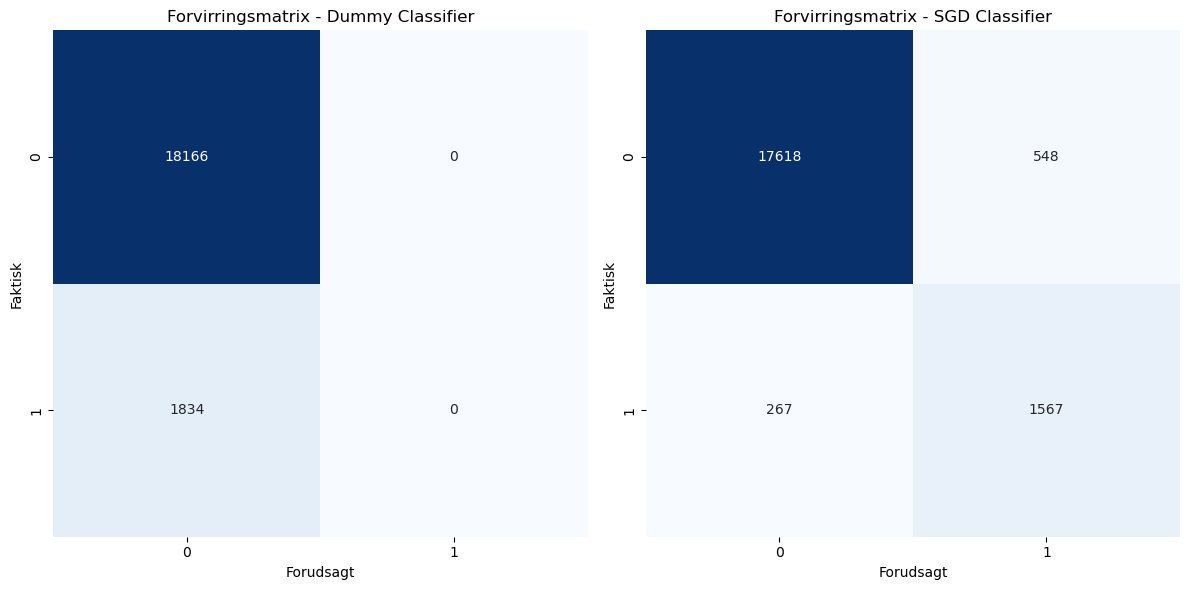

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Forvirringsmatrix for Dummy Classifier
M_dummy = np.array([[18166, 0],
                    [1834, 0]])

# Forvirringsmatrix for SGD Classifier
M_sgd = np.array([[17618, 548],
                  [267, 1567]])

# Opret en figur med subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Opret varmekort for begge forvirringsmatricer
sns.heatmap(M_dummy, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Forvirringsmatrix - Dummy Classifier')
axes[0].set_xlabel('Forudsagt')
axes[0].set_ylabel('Faktisk')

sns.heatmap(M_sgd, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Forvirringsmatrix - SGD Classifier')
axes[1].set_xlabel('Forudsagt')
axes[1].set_ylabel('Faktisk')

plt.tight_layout()
plt.show()


In [ ]:
# To forvirringsmatricer er defineret ved hjælp af NumPy-arrays. Disse matricer repræsenterer resultaterne af to forskellige klassifikatorer:
# Dummy Classifier og SGD Classifier.
# Hver forvirringsmatrix er en 2x2 matrix med fire værdier:
# Værdien øverst til venstre repræsenterer Sandt Negative (TN).
# Værdien øverst til højre repræsenterer Falske Positive (FP).
# Værdien nederst til venstre repræsenterer Falske Negative (FN).
# Værdien nederst til højre repræsenterer Sandt Positive (TP).

# Løst af en robot (AI)

### Qe Conclusion

In [ ]:
# Vi dykkede ned i metrikker som nøjagtighed, præcision, recall og F1-score for at kvantificere modelpræstationen. 
# Implementerede brugerdefinerede funktioner til præcision, recall og F1-score, hvilket fordybede vores forståelse af deres
# beregninger. Ved hjælp af Scikit-Learn anvendte vi standard evalueringsmetrikker, hvilket gjorde det muligt at sammenligne
# med vores brugerdefinerede implementeringer. Ved at vurdere en Dummy Classifier mod en SGD Classifier forstod vi 
# betydningen af modelvalg. Vi lærte vigtigheden af at opdele data i trænings- og testmængder for en realistisk 
# modelvurdering. Vi lærte, hvordan ubalancerede datasæt blev tydelige, hvilket understregede værdien af præcision og
# recall. Til sidst lærte vi varmekort for at skabe en klar præsentation og fortolkning af evalueringsresultaterne. Alt 
# i alt udstyrede disse øvelser os til at vurdere og sammenligne machine learning-modeller grundigt. Vi forstod 
# metriskompromisser, forfine vores færdigheder inden for dataopdeling og anerkendte udfordringerne ved ubalancerede data.
